In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import statsmodels.api


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
import warnings 
warnings.filterwarnings("ignore")

# 1. Understand the problem

Le problème que notre projet va régler est un problème d'admission au master à l'Université Polytechnique Houphouët-Boigny de yamaskois. apres l'ouverture de la filière Data Science et intelligence artificielle, le corps enseignant se rend compte que plusieurs étudiants souhaitent postuler à ce master. 
Étant débordé par les demandes, elle decide de faire confiance à un étudiant en IA de GOMYCODE pour développer un modele de détection de personnes admissibles à ce master juste avec les résultats des tests et aptitudes requises pour ce master. ainsi la finalisation de ce projet permettra de minimiser le temps d'étude des dossiers et aussi de permettre de faire des entretiens ciblés et éviter aux candidats de perdre assez de temps. en plus elle permettra de cibler les meilleurs element afin de faire de ce programme un programme d'excellence en Cote d'ivoire.

# 2. Choose an appropriate data

Nous allons choisir un jeu de données relatifs au informations basique que l'on demande a un licencié afin d'etre admis en Master.

COMPREHENSION DE LA FUTURE DATASET CHOISI :

GRE Scores (290 to 340) : Score du test de logique, mathematique redaction et pensée critique

TOEFL Scores (92 to 120) : Le Test of English as a Foreign Language (TOEFL) est un test d'anglais très populaire auprès des universités du monde entier. Il est noté sur la base de trois sections : Lecture, Écoute, Expression orale et Écriture, chacune d'entre elles étant notée sur 30, ce qui donne un score maximum de 120 et un minimum de 0.

University Rating (1 to 5) : Le classement de l'université où l'étudiant a obtenu son diplôme de premier cycle.

Statement of Purpose (1 to 5) : 
La déclaration d'intention (SOP) est une lettre écrite par l'étudiant lui-même pour exposer son objectif et sa motivation à obtenir un diplôme d'études supérieures, ainsi que ses objectifs pendant et après ses études. De nombreuses universités trouvent cette lettre importante car elle décrit mieux l'étudiant d'un point de vue personnel.

Letter of Recommendation Strength (1 to 5) : La lettre de recommandation (LOR) est une lettre écrite par une personne qui connaît l'étudiant et qui recommande à l'université d'accepter son admission. Cette personne peut être un professeur du premier cycle universitaire ou un professionnel avec lequel l'étudiant a travaillé.

Undergraduate CGPA (6.8 to 9.92) : La moyenne cumulative des points (CGPA) est une mesure des notes d'un étudiant, c'est-à-dire de sa performance dans son diplôme de premier cycle.

Research Experience (0 or 1) L'experience que L'etudiant a en terme de recherches et de motivation au travail 

Chance of Admit : La target de notre Dataset c'est a dire les chances que notre Etudiants sera admis au programme ou non.

Les chiffres entre parentheses sont les Notes attribué a ces different rubriques de la plus petite a la plus grosse note 

A) Extraction de la Dataset

In [62]:
data = pd.read_csv("Admission_Predict.csv")
data.shape

(400, 9)

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

Nous allons ensuite pretraiter les données que nous avons en tenant compte de ce que nous avons appris en classe 

# 3. Prepare the data ( Preprocessing Phase )

In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [131]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

J'ai decidé alors de supprimer la table SerialNo car elle ne nous aidera pas dans notre tache.

In [86]:
data.drop('Serial No.', axis=1, inplace=True)

Nous remarquons alors que nos données sont propre, traité et nettoyé comme il se doit car il n'y a aucune donnée manquante et les tables obsoletes ont ete retirés

# 4. Do some visualization

Les cartes thermiques de corrélation sont un type de graphique qui permet de visualiser la force des relations entre les variables numériques. Les graphiques de corrélation sont utilisés pour comprendre quelles variables sont liées les unes aux autres et la force de cette relation.


Text(0.5, 1.0, 'Correlation Factors Heat Map')

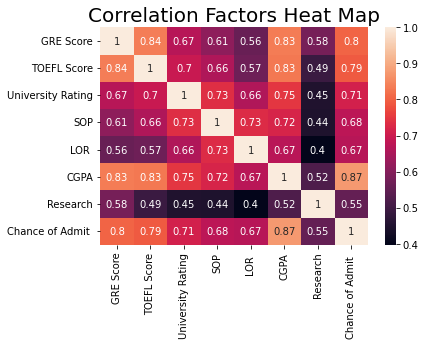

In [15]:
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

Ici nous pouvons remarquer et identifier les elements qui sont en fortes correlations comme par exemple le GRE SCORE Et le TOEFL qui ont une grande force relationnelle.

In [16]:
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,400.000000
mean,316.807500
std,11.473646
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


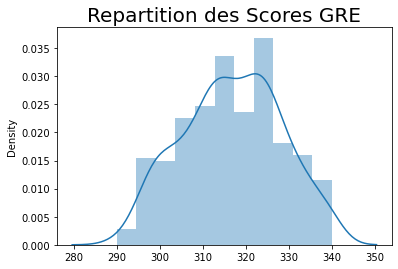

In [18]:
sns.distplot(GRE).set_title('Repartition des Scores GRE', size='20')
plt.show()

Par ce graphe nous voyons que les scores GRE sont reparties equitablement entre les differentes moyenne de point. a noter aussi que les scores entre 320 et 335 apparraissent beaucoup dans les relevés de nos etudiants

In [24]:
TOEFL = pd.DataFrame(data['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,400.000000
mean,107.410000
std,6.069514
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


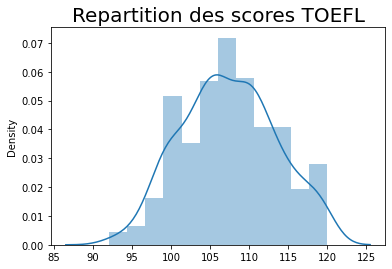

In [25]:
sns.distplot(TOEFL).set_title('Repartition des scores TOEFL', size='20')
plt.show()

Par ce graphe nous voyons que les scores TOEFL sont reparties equitablement entre les differentes moyenne de point. a noter aussi que les scores entre 105 et 110 apparraissent beaucoup dans les relevés de nos etudiants

In [26]:
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,400.000000
mean,8.598925
std,0.596317
min,6.800000
25%,8.170000
50%,8.610000
75%,9.062500
max,9.920000


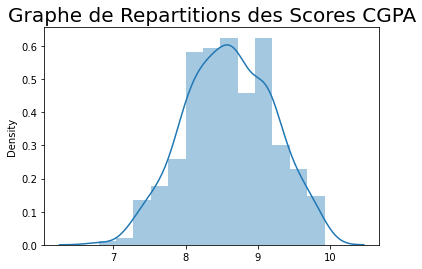

In [28]:
sns.distplot(CGPA).set_title('Graphe de Repartitions des Scores CGPA', size='20')
plt.show()

Nous allons ensuite visualiser la table recherche en utilisant un Pie chart et voir ensuite comment les données sont reparties entre les etudiants qui sont deja etiquetés comme studieux et ceux qui ne le sont pas 

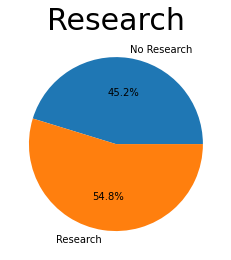

In [29]:
RES_Count = data.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

Nous remarquons que 54% des etudiants postulant au Master ont des tendances studieuse

In [32]:
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,26
2,107
3,133
4,74
5,60


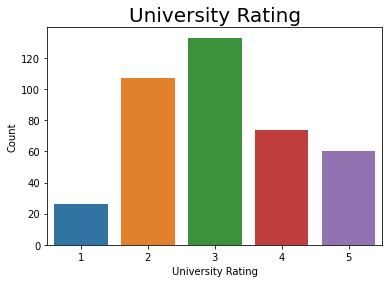

In [66]:
sns.barplot(University_Rating.index, University_Rating['Count']).set_title('University Rating', size='20')
plt.show()

Bar Chart montrant le nombre de postulant et leurs differentes categories de prestige d'université. Nous remarquons que c'est le Rang No 3 qui domine assez le classement.

In [67]:
SOP = pd.DataFrame(data.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,20
2.0,33
2.5,47
3.0,64
3.5,70
4.0,70
4.5,53
5.0,37


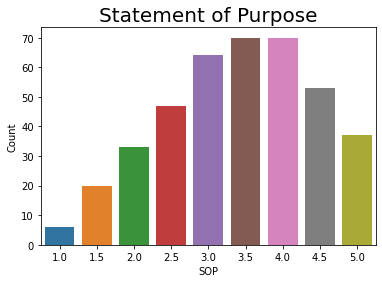

In [68]:
sns.barplot(SOP.index, SOP['Count']).set_title('Statement of Purpose', size='20')
plt.show()

Bar Chart montrant le nombre de postulant et leurs diffentes notes resultant de leurs Lettre d'intention deposé. Nous remarquons que la majorité des etudiants ont entre 3.5 et 4 a cet exercice

In [70]:
data.columns = data.columns.to_series().apply(lambda x: x.strip())

In [72]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,7
2.0,38
2.5,39
3.0,85
3.5,73
4.0,77
4.5,45
5.0,35


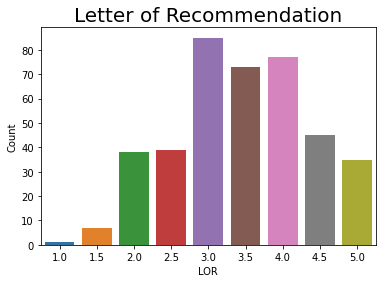

In [73]:
sns.barplot(LOR.index, LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

Bar Chart montrant le nombre de postulant et leurs diffentes notes resultant de leurs Lettre de recommandation deposé. Nous remarquons que la majorité des etudiants ont entre 3 et 4 a cet exercice

Apres comparaison nous remarquons que assez d'etudiants postulant ont des resultats au dessus de la moyenne et sont de tres bon eleve car ils ont de bonne notes a presque tout les test passés.

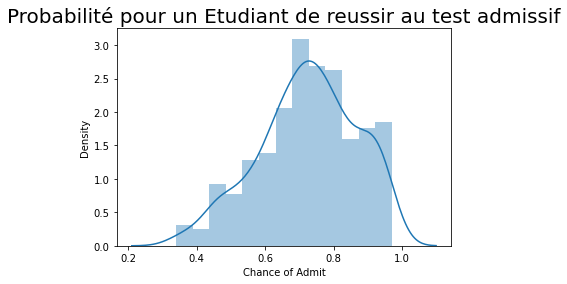

In [79]:
data['Chance of Admit']
sns.distplot(data['Chance of Admit']).set_title('Probabilité pour un Etudiant de reussir au test admissif', size='20')
plt.show()

In [81]:
data.describe()['Chance of Admit']

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit, dtype: float64

Nous remarquons que beaucoup d'etudiants ont une probabilité superieure a 60% et plus c'est a dire que vu les donnés que nous avons plusieurs etudiants sont competitifs et iront en Master certainement vu leurs bon resultats

Ensuite pour Predire les chances d'admission d'un etudiant souhaitant postuler nous allons calculer la correllation entre les chances d'admission et les differentes features identifiés

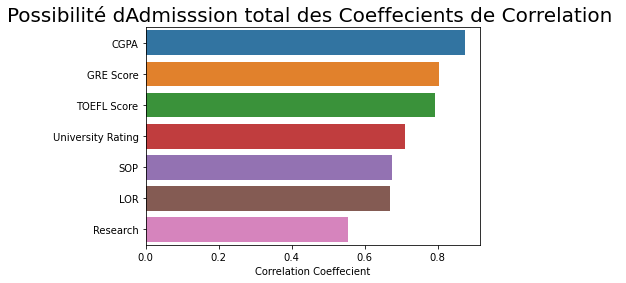

In [87]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Possibilité dAdmisssion total des Coeffecients de Correlation ', size='20')
plt.show()

In [88]:
COA_corr

,Correlation Coeffecient
CGPA,0.873289
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
Research,0.553202


Nous finissons par realiser que les elements qui permettent de determiner le plus les chances d'admission sont le CGPA, le GRE SCORE ET LE TOEFL suivi du classement de l'université. le SOP, LOR et research passent en derniere position;

# 5. Choose the right algorithm

Nous allons utiliser 4 modeles de Machine Learning Supervisé que nous avons appris en classe et a la fin choisir le plus precis pour le retenir comme modele de preference pour la mise en oeuvre de notre intelligence artificielle.
    
1-Logistic Regression

2-Decision Tree 

3-Random Forest

4-K Nearest Neighbors (KNN)

# 6. Model and Experiment 

In [90]:
X = data.drop(["Chance of Admit"],axis=1)
y = data["Chance of Admit"].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

In [95]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]


y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

1- Logistic Regression 

In [96]:
logr = LogisticRegression()
logr.fit(X_train,y_train_01)

LogisticRegression()

In [97]:
y_predlogr = logr.predict(X_test)

In [128]:
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))

Accuracy Score: 0.975


In [127]:
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)

[[67  1]
 [ 1 11]]


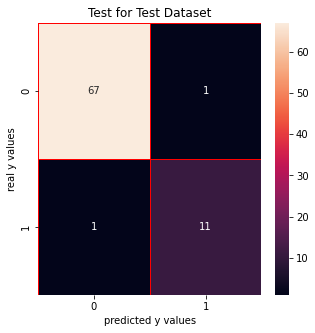

In [100]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

TP:11

TN:67 

FP:1

FN:1

In [126]:
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))


print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.9166666666666666
recall_score:  0.9166666666666666
f1_score:  0.9166666666666666


2. Decision Tree 

In [102]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train_01)
y_pred_dtc = dtc.predict(X_test)
print("score: ", dtc.score(X_test,y_test_01))

score:  0.925


In [124]:
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
cm_dtc

array([[65,  3],
       [ 3,  9]], dtype=int64)

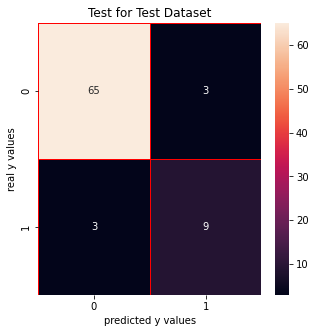

In [123]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

TP:9

TN:65

FP:3

FN:3

In [122]:
print("precision_score: ", precision_score(y_test_01, y_pred_dtc))
print("recall_score: ", recall_score(y_test_01, y_pred_dtc))

print("f1_score: ",f1_score(y_test_01, y_pred_dtc))

precision_score:  0.75
recall_score:  0.75
f1_score:  0.75


5. Random Forest


In [121]:
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(X_train,y_train_01)

y_pred_rfc = rfc.predict(X_test)

print("score: ", rfc.score(X_test, y_test_01))

score:  0.9375


In [120]:
cm_rfc = confusion_matrix(y_test_01, y_pred_rfc)
cm_rfc

array([[65,  3],
       [ 2, 10]], dtype=int64)

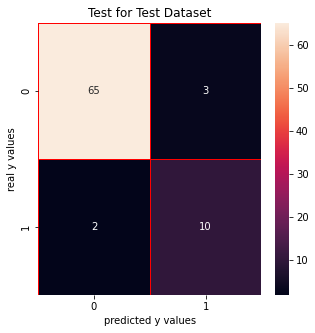

In [119]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

TP:10 

TN: 65

FP:3

FN:2

4. K Nearest Neighbors


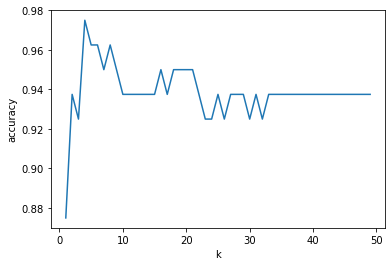

In [111]:
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train, y_train_01)
    scores.append(knn_n.score(X_test, y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [115]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train_01)

y_pred_knn = knn.predict(X_test)
print("score of 3 :",knn.score(X_test,y_test_01))

score of 3 : 0.925


En ameliorant le modele en ajoutant juste 4 nous avons :

In [132]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train_01)

y_pred_knn = knn.predict(X_test)
print("score of 4 :",knn.score(X_test,y_test_01))

score of 4 : 0.975


In [125]:
cm_knn = confusion_matrix(y_test_01, y_pred_knn)
cm_knn

array([[67,  1],
       [ 1, 11]], dtype=int64)

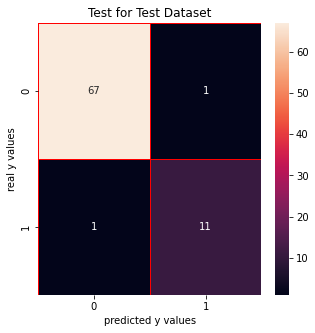

In [118]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

TP:67 L'algo a predis que 67 personnes ont ete admis et effectivement ils ont ete admis

TN:11

FP:1

FN:1

In [129]:
print("precision_score: ", precision_score(y_test_01, y_pred_knn))
print("recall_score: ", recall_score(y_test_01, y_pred_knn))


print("f1_score: ",f1_score(y_test_01, y_pred_knn))

precision_score:  0.9166666666666666
recall_score:  0.9166666666666666
f1_score:  0.9166666666666666


# CONCLUSION

L'etude que nous avons mene pas a pas nous a permit a l'aide d'un jeu de donnée de :

1. Comprendre un probleme social precis et proposer une solution afin de regler le probleme 
2. Choisir un jeu de données precis nous permettant de regler le probleme facilement
3. Preparer les données en les nettoyant et les rendant utilisable
4. Visualiser pour faciliter le choix des elements et connaitre l'importance de chaque element dans notre jeu de donnée
5. Choisir les algorithmes a utiliser
6. Utiliser les modeles appris 
7. Experimenter les precisions de notre travail;


En fin de compte nous retenons le modele KNN car apres amelioration du parametrages nous nous retrouvons a 97% de precision quand a la prediction du taux d'admission.
